In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import sys
import matplotlib.pyplot as plt 
np.set_printoptions(threshold=sys.maxsize)

In [2]:
csv1 = pd.read_csv('sequence_execution_time.csv')
#csv1.head()

In [3]:
csv1.tail()

,sequence_identifier,read_sequence,quality,execution_time
3999995,@HWI-D00360:5:H814YADXX:1:1115:18756:14266 1:N...,ACTAATAAAGAAAAAAAGAGAGAAGAATCAAATAGACGCAATAAAA...,C@CFFFFFHHHHHJGEHHIJJJIJIIJJJJJIJJIFIIIIGIJJIJ...,341.792
3999996,@HWI-D00360:5:H814YADXX:1:1115:18805:14266 1:N...,ATAAATGAATAATAGGCGGTTTCTGACATCAGGAAGTTTAGACCGC...,CCCFFFFFGHHHHJJJJJJGIJHIJGIIJJIJJIIJHIJJIIJJJJ...,556.625
3999997,@HWI-D00360:5:H814YADXX:1:1115:18868:14278 1:N...,GTATGGAAATACCTGGATGTCCAGGCAGAAGTGTGCTACAGGGGCA...,@@CFFFFFHGHHHJIIIGIGHHAGGGIIBGG?ECCFFHIJJGEBDA...,8523.708
3999998,@HWI-D00360:5:H814YADXX:1:1115:18797:14322 1:N...,AACTCAGTAATTACTTTGATTTGGAGTCTTAATGCAATTTTACCCA...,CCCFFFFFHDHHHJJJJJJIJJJIJIHGHIIJJJJIJIJJJJJJJI...,880.708
3999999,@HWI-D00360:5:H814YADXX:1:1115:18971:14400 1:N...,GAAAATAGTTTCCCATTTGTTGCCACTGTTTTAAACTTACTGTTAT...,@@@FDFDBBDFFBFIGGGCFGFHHGIGEHIIIIEIIGE@GIIIGGI...,624.208


In [4]:
#data = csv1.drop(['sequence_identifier','quality'], axis = 1)
data = csv1

In [5]:
data1 = data.drop(csv1.index[500000:]) #reduce dataset to 10% of original dataframe
#data.head()

In [6]:
data1.tail()

,sequence_identifier,read_sequence,quality,execution_time
499995,@HWI-D00360:5:H814YADXX:1:1102:17469:86576 1:N...,TTTTCATGCAGACTAAATTTGCCACGGCCTTCAAAAATCCTTCTCA...,CCCFFFFFHHGHHJIJJJJJGIJGJIIIJJJJJJJJJJIIIJJIJJ...,230.083
499996,@HWI-D00360:5:H814YADXX:1:1102:17415:86578 1:N...,AATGGAATGGAATGGAATGCAATTGAATCAACCCGAGTGCAATGGA...,C@@FFFDDFAFHBGFBDDAHICGDHHIEBHBACFD?F?D?GHCGBD...,1875.917
499997,@HWI-D00360:5:H814YADXX:1:1102:17270:86593 1:N...,GACCCTATGACTGTATCTCTCTGATTCACCTGACATTCACCCCATT...,CCCFFDFDHFFHHGGFE<CBFEGGGGEHCHIIEEHIIGBBHHHGEH...,3203.583
499998,@HWI-D00360:5:H814YADXX:1:1102:17487:86606 1:N...,CTGCTGGTCACAGCCACCTGTGTCTGTCCCTCAGTGTGGGCTGGTA...,CCCFFFFFHHHHHJJJJJJJJIJJJJJJJJJJJJHJGIJJJJJJJJ...,677.250
499999,@HWI-D00360:5:H814YADXX:1:1102:17363:86632 1:N...,TTTAATTTACACAAATATAACCTCCAAAAATTGCCCTGAGTTTGGA...,BCCFFFFFHHGGHJJJJJIJGJGIJJIIJIJJJJIJJJGHHIIGIG...,760.625


In [7]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

seq_trans = le.fit_transform(data1["read_sequence"])
seq_ide_trans = le.fit_transform(data1["sequence_identifier"])
quali_trans = le.fit_transform(data1["quality"])


In [8]:
data1['seq_encoded']=seq_trans
data1['seq_id_encoded']=seq_ide_trans
data1['qual_encoded']=quali_trans
data1.head()

,sequence_identifier,read_sequence,quality,execution_time,seq_encoded,seq_id_encoded,qual_encoded
0,@HWI-D00360:5:H814YADXX:1:1101:1205:2142 1:N:0...,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJIJJJJJIJ...,2295.125,246964,29031,466307
1,@HWI-D00360:5:H814YADXX:1:1101:1244:2206 1:N:0...,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,@<;DFFFFFDDHDGGGGGGIGFGIGEIIGICHGIEDEGGHGGHHGF...,674.000,433529,34707,21648
2,@HWI-D00360:5:H814YADXX:1:1101:1295:2128 1:N:0...,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJHIJJJJJJJJIJJHJJI...,757.209,80915,42381,437021
3,@HWI-D00360:5:H814YADXX:1:1101:1460:2184 1:N:0...,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,;@@DDEFFHGHHHGIIIFIIIGICGCHHHGI?FHIIHDCA>GHIII...,397.042,127402,67220,3587
4,@HWI-D00360:5:H814YADXX:1:1101:1597:2113 1:N:0...,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ...,675.000,185185,88179,497964


In [9]:
data1.nunique()

sequence_identifier    500000
read_sequence          499541
quality                500000
execution_time         145840
seq_encoded            499541
seq_id_encoded         500000
qual_encoded           500000
dtype: int64

In [10]:
data1 = data1.drop(['sequence_identifier','read_sequence','quality'], axis = 1)
data1.head()

,execution_time,seq_encoded,seq_id_encoded,qual_encoded
0,2295.125,246964,29031,466307
1,674.000,433529,34707,21648
2,757.209,80915,42381,437021
3,397.042,127402,67220,3587
4,675.000,185185,88179,497964


In [11]:
data1.describe()

,execution_time,seq_encoded,seq_id_encoded,qual_encoded
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,2008.569778,249761.903914,249999.500000,249999.500000
std,4002.491133,144199.758077,144337.711634,144337.711634
min,176.958000,0.000000,0.000000,0.000000
25%,560.667000,124889.750000,124999.750000,124999.750000
50%,676.459000,249759.500000,249999.500000,249999.500000
75%,1410.104500,374636.250000,374999.250000,374999.250000
max,124555.542000,499540.000000,499999.000000,499999.000000


In [12]:
data1 = data1.drop(['seq_id_encoded','qual_encoded'], axis = 1)
data1.head()

,execution_time,seq_encoded
0,2295.125,246964
1,674.000,433529
2,757.209,80915
3,397.042,127402
4,675.000,185185


In [13]:
Y= data1[['execution_time']]

#Y=np.ravel(Y)
X= data1.drop('execution_time', axis =1)

In [14]:
Y['execution_time']= np.log10(Y.execution_time)
Y

<ipython-input-14-ccc6ac07e441>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['execution_time']= np.log10(Y.execution_time)


,execution_time
0,3.360806
1,2.828660
2,2.879216
3,2.598836
4,2.829304
...,...
499995,2.361885
499996,3.273214
499997,3.505636
499998,2.830749


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1) 
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (400000, 1)
X_test (100000, 1)
y_train (400000, 1)
y_test (100000, 1)


In [16]:
#y_test

In [17]:
import tensorflow as tf
from tensorflow import keras

In [29]:
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 64
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim = 1),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    #keras.layers.Dense(M, activation=tf.nn.relu),
    #keras.layers.Dense(M, activation=tf.nn.relu),
    #keras.layers.Dense(M, activation=tf.nn.relu),
    #keras.layers.Dense(M, activation=tf.nn.relu),
    #keras.layers.Dense(M, activation=tf.nn.relu),
   #keras.layers.Dense(M, activation=tf.nn.relu),
   #keras.layers.Dense(M, activation=tf.nn.relu),
   #keras.layers.Dense(M, activation=tf.nn.relu),
   #keras.layers.Dense(M, activation=tf.nn.relu),
   #keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                128       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
#history = model.fit(X_train, y_train, epochs=300, batch_size=128, verbose=True, validation_data = (X_test,y_test))
history = model.fit(X_train, y_train, epochs=100, batch_size=1024, verbose=True, validation_split = 0.3)

Epoch 1/100
274/274 [==============================] - 9s 15ms/step - loss: 21842236.0000 - accuracy: 0.0000e+00 - val_loss: 2406.4309 - val_accuracy: 0.0000e+00
Epoch 2/100
274/274 [==============================] - 4s 13ms/step - loss: 28752.7930 - accuracy: 0.0000e+00 - val_loss: 3.2938 - val_accuracy: 0.0000e+00
Epoch 3/100
274/274 [==============================] - 4s 13ms/step - loss: 2266.2517 - accuracy: 0.0000e+00 - val_loss: 3.3084 - val_accuracy: 0.0000e+00
Epoch 4/100
274/274 [==============================] - 4s 13ms/step - loss: 184.5858 - accuracy: 0.0000e+00 - val_loss: 4.6475 - val_accuracy: 0.0000e+00
Epoch 5/100
274/274 [==============================] - 3s 12ms/step - loss: 15.2624 - accuracy: 0.0000e+00 - val_loss: 5.8917 - val_accuracy: 0.0000e+00
Epoch 6/100
274/274 [==============================] - 4s 13ms/step - loss: 5.9349 - accuracy: 0.0000e+00 - val_loss: 5.3851 - val_accuracy: 0.0000e+00
Epoch 7/100
274/274 [==============================] - 4s 13ms/step 

In [31]:
ypred = model.predict(X_test)

3125/3125 [==============================] - 9s 3ms/step


In [32]:
ypred.shape

(100000, 1)

In [33]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, ypred))
rmse 

0.4504642024076645

In [34]:
from sklearn.metrics import mean_squared_error
print("MSE: %.4f" % mean_squared_error(y_test, ypred))

MSE: 0.2029


In [35]:
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y_test,ypred)**0.5
rmsle

0.10783135402178189

In [36]:
y_pred_non_log = np.exp(ypred)
y_test_non_log = np.exp(y_test)

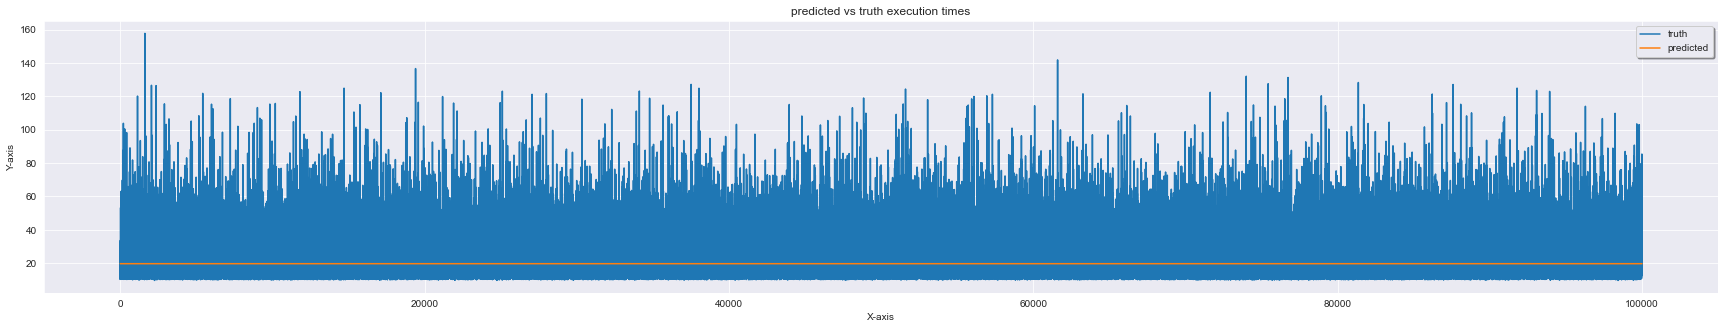

In [37]:
x_ax = range(len(y_test_non_log))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax,y_test_non_log, label="truth")
plt.plot(x_ax, y_pred_non_log, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [210]:
#ypred

In [41]:
#y_pred_non_log